In [1]:
from keras import layers
from keras import models

Using TensorFlow backend.


In [2]:
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3),
          activation='relu',
          input_shape=(150, 150, 3)))

model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)      

In [3]:
from keras import optimizers

model.compile(loss='binary_crossentropy',
             optimizer=optimizers.RMSprop(lr=1e-4),
             metrics=['acc'])

In [4]:
# Директории
import os

BASE_DIR = '/Users/admin/Documents/Learn python/deep_learning_edu/Chapter 5/cats_and_dogs_small'

TRAIN_DIR = os.path.join(BASE_DIR, 'train/')
VALIDATION_DIR = os.path.join(BASE_DIR, 'validation/')
TEST_DIR = os.path.join(BASE_DIR, 'test/')

TRAIN_CATS_DIR = os.path.join(TRAIN_DIR, 'cats')
TRAIN_DOGS_DIR = os.path.join(TRAIN_DIR, 'dogs')

VALIDATION_CATS_DIR = os.path.join(VALIDATION_DIR, 'cats')
VALIDATION_DOGS_DIR = os.path.join(VALIDATION_DIR, 'dogs')

TEST_CATS_DIR = os.path.join(TEST_DIR, 'cats')
TEST_DOGS_DIR = os.path.join(TEST_DIR, 'dogs')

In [5]:
# Подготовка изображений перед загрузкой в сеть
from keras.preprocessing.image import ImageDataGenerator

# Масштабировать значения с коэффициентом 1/255
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1.255)

train_generator = train_datagen.flow_from_directory(
    TRAIN_DIR,
    target_size=(150, 150), # Привести к размеру
    batch_size=20,
    class_mode='binary') # тк используется binary_crossentropy

validation_generator = test_datagen.flow_from_directory(
    VALIDATION_DIR,
    target_size=(150,150),
    batch_size=20,
    class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [6]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=50)

Epoch 1/30
100/100 [==============================] - 68s 679ms/step - loss: 0.6961 - acc: 0.5255 - val_loss: 20.5053 - val_acc: 0.5500
Epoch 2/30
100/100 [==============================] - 72s 721ms/step - loss: 0.6524 - acc: 0.6260 - val_loss: 94.2914 - val_acc: 0.5670
Epoch 3/30
100/100 [==============================] - 70s 705ms/step - loss: 0.6050 - acc: 0.6800 - val_loss: 99.0486 - val_acc: 0.6280
Epoch 4/30
100/100 [==============================] - 71s 711ms/step - loss: 0.5610 - acc: 0.7070 - val_loss: 66.2360 - val_acc: 0.6700
Epoch 5/30
100/100 [==============================] - 72s 716ms/step - loss: 0.5382 - acc: 0.7305 - val_loss: 21.2857 - val_acc: 0.6850
Epoch 6/30
100/100 [==============================] - 71s 713ms/step - loss: 0.5143 - acc: 0.7375 - val_loss: 102.4860 - val_acc: 0.6660
Epoch 7/30
100/100 [==============================] - 71s 714ms/step - loss: 0.4775 - acc: 0.7785 - val_loss: 214.5420 - val_acc: 0.6800
Epoch 8/30
100/100 [==========================

In [7]:
model.save('cats_and_dogs_small_1.h5') # Сохранение модели

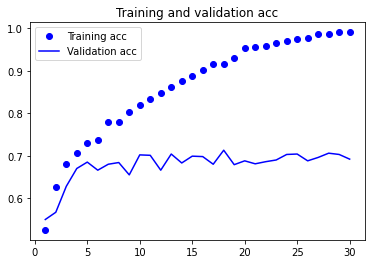

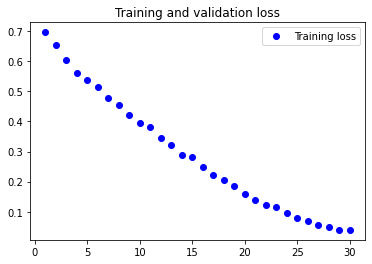

In [9]:
# Строим графики
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation acc')
plt.legend()

plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
# plt.plot(epochs, val_loss, 'b', label='Validation loss') # неверные границы
plt.title('Training and validation loss')
plt.legend()

plt.show()